<a href="https://colab.research.google.com/github/keirkwame/axionEmu/blob/main/Open_access_of_2e5_emulator_NN_tt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# setting the seed for reproducibility
np.random.seed(2)
tf.random.set_seed(4)

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
model_parameters = ['h', 
                    'tau_reio', 
                    'omega_b', 
                    'n_s', 
                    'ln10A_s', 
                    'omega_cdm',
                    'log10ma',
                    'omega_ax' 
                    ]

In [ ]:
np.linspace(0,28,15)

In [3]:
import pickle
collection_list = []
for i in np.linspace(0, 119, 120): #28,15):
    #f = open('/home/anran/axionCAMB/test_data_collect_9params_5e5_mp_test_'+str(int(i))+'.pkl', 'rb')
    f = open('/home/keir/Software/axionEmu/data_collection_axion/test_data_collect_9params_5e5_mp_test_'+str(int(i))+'.pkl', 'rb')
    collection = pickle.load(f)
    f.close()
    print(len(collection['C_phi']))
    collection_list.append(collection)
    
import random
random.shuffle(collection_list)

986
987
984
982
983
983
983
988
989
982
985
976
986
977
983
982
982
987
982
984
980
989
983
987
990
988
987
986
985
985
983
985
990
985
985
986
981
983
975
982
990
983
982
974
986
985
986
984
984
974
988
977
992
984
984
987
989
979
978
988
985
981
990
987
982
985
983
986
984
983
984
987
984
986
984
984
980
983
986
984
979
980
982
987
988
989
985
987
984
984
983
983
988
982
985
980
992
983
983
987
986
987
978
983
985
990
984
983
989
985
991
981
982
981
981
982
982
984
981
985


In [ ]:
import pickle
for i in np.linspace(0,28,15):
    f = open('/home/anran/axionCAMB/test_data_collect_9params_5e5_mp_test_'+str(int(i)+30)+'.pkl', 'rb')
    collection = pickle.load(f)
    f.close()
    print(len(collection['C_tt']))
    collection_list.append(collection)
    
import random
random.shuffle(collection_list)

In [ ]:
print(len(collection_list[0]['params']['omega_b']))
print(len(collection_list))
print(collection_list[0]['params'].keys())
print(collection_list[0].keys())
print(collection_list[0]['l_index'][0])


In [4]:
import numpy as np
parameters_list = {}
for key in collection['params']:
    parameters_list[key] = np.array([])

C_phi_list = []

for i in range(120):
    para = collection_list[i]['params']
    C_phi_list.extend(collection_list[i]['C_phi'])
    for key in para:
      parameters_list[key] = np.concatenate((parameters_list[key], para[key]))

spectra_= np.array(C_phi_list)/1. #(7.4311*10**(12))
print(spectra_.shape)

#Remove nan spectra
spectra_bool = np.array(np.sum(~np.isnan(spectra_), axis=1), dtype=bool)
print(spectra_bool)
spectra_ = spectra_[spectra_bool, :]
for key in parameters_list.keys():
    parameters_list[key] = parameters_list[key][spectra_bool]
    print(parameters_list[key].shape)
print(spectra_.shape)

cut_off = 65000 #108000
import copy
training_parameters_ = copy.deepcopy(parameters_list)
h_0 = training_parameters_['H_0'][:cut_off]/100
ln10_10A_s = np.log(training_parameters_['A_s'][:cut_off]*10**10)
ma_mass = np.array(training_parameters_['ma'][:cut_off]*10**32,dtype='float64')
ma_mass = np.log10(ma_mass)
training_parameters = dict()
training_parameters['omega_b'] = training_parameters_['omega_b'][:cut_off]
training_parameters['omega_cdm'] = training_parameters_['omega_cdm'][:cut_off]
training_parameters['h'] = h_0
training_parameters['tau_reio'] = training_parameters_['tau_reio'][:cut_off]
training_parameters['n_s'] = training_parameters_['n_s'][:cut_off]
training_parameters['ln10A_s'] = ln10_10A_s
training_parameters['log10ma'] = ma_mass
training_parameters['omega_ax'] = training_parameters_['omega_ax'][:cut_off]
ell_range = np.linspace(2,1500, 1499)

test_parameters_ = copy.deepcopy(parameters_list)
h_0 = test_parameters_['H_0'][cut_off:]/100
ln10_10A_s = np.log(test_parameters_['A_s'][cut_off:]*10**10)
ma_mass = np.array(test_parameters_['ma'][cut_off:]*10**32, dtype = 'float64')
ma_mass = np.log10(ma_mass)
test_parameters = dict()
test_parameters['omega_b'] = test_parameters_['omega_b'][cut_off:]
test_parameters['omega_cdm'] = test_parameters_['omega_cdm'][cut_off:]
test_parameters['h'] = h_0
test_parameters['tau_reio'] = test_parameters_['tau_reio'][cut_off:]
test_parameters['n_s'] = test_parameters_['n_s'][cut_off:]
test_parameters['ln10A_s'] = ln10_10A_s
test_parameters['omega_ax'] = test_parameters_['omega_ax'][cut_off:]
test_parameters['log10ma'] = ma_mass

spectra_ = spectra_[:,:ell_range.shape[0]]/1. #(ell_range*(ell_range+1)/(2.*np.pi))
training_log_spectra = np.log10(spectra_)[:cut_off,:]
testing_spectra = spectra_[cut_off:,:]
print('number of training spectra: ', training_log_spectra.shape)
print('number of testing spectra: ', testing_spectra.shape)



(118099, 6300)
[False  True  True ... False  True False]
(71490,)
(71490,)
(71490,)
(71490,)
(71490,)
(71490,)
(71490,)
(71490,)
(71490,)
(71490, 6300)
number of training spectra:  (65000, 1499)
number of testing spectra:  (6490, 1499)


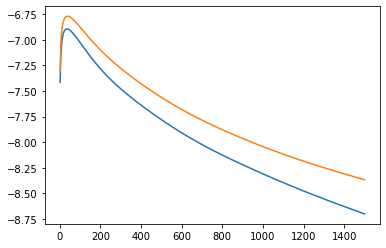

In [5]:
%matplotlib inline
plt.plot(ell_range, training_log_spectra[0])
plt.plot(ell_range, training_log_spectra[-1])


In [6]:
test_collection = {}
test_collection['training_parameters'] = training_parameters
test_collection['test_parameters'] = test_parameters
test_collection['training_log_spectra'] = training_log_spectra
test_collection['testing_spectra'] = testing_spectra
import pickle
f = open('test_collection_C_phi_no_nan.pkl', 'wb')
pickle.dump(test_collection, f)
f.close()

In [ ]:
##Only for Google Colab
!git clone https://github.com/keirkwame/axionEmu.git

In [7]:
from axionEmu.cosmopower import cosmopower_NN

# instantiate NN class
cp_nn = cosmopower_NN(parameters=model_parameters, 
                      modes=ell_range, 
                      n_hidden = [512, 512, 512,512], # 4 hidden layers, each with 512 nodes
                      verbose=True, # useful to understand the different steps in initialisation and training
                      )


Initialized cosmopower_NN model, 
mapping 8 input parameters to 1499 output modes, 
using 4 hidden layers, 
with [512, 512, 512, 512] nodes, respectively. 



In [8]:
import tensorflow as tf
with tf.device('/device:GPU:0'): # ensures we are running on a GPU
    # train
    cp_nn.train(training_parameters=training_parameters,
                training_features=training_log_spectra,
                filename_saved_model='phi_NN_axion',
                # cooling schedule
                validation_split=0.1,
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024,1024,1024,1024,1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100],
                max_epochs = [1000,1000,1000,1000,1000],
                )


Starting cosmopower_NN training, 
using 10 per cent of training samples for validation. 
Performing 5 learning steps, with 
[0.01, 0.001, 0.0001, 1e-05, 1e-06] learning rates 
[1024, 1024, 1024, 1024, 1024] batch sizes 
[1, 1, 1, 1, 1] gradient accumulation steps 
[100, 100, 100, 100, 100] patience values 
[1000, 1000, 1000, 1000, 1000] max epochs 

learning rate = 0.01, batch size = 1024


  0%|          | 0/1000 [00:00<?, ?it/s]

 25%|██▌       | 253/1000 [06:25<18:59,  1.52s/it, loss=0.0301]


Validation loss = 0.01673314
Model saved.
Reached max number of epochs. Validation loss = 0.01673314
Model saved.
learning rate = 0.001, batch size = 1024


 12%|█▎        | 125/1000 [03:09<22:04,  1.51s/it, loss=0.0303]


Validation loss = 0.008937402
Model saved.
Reached max number of epochs. Validation loss = 0.008937402
Model saved.
learning rate = 0.0001, batch size = 1024


 15%|█▌        | 152/1000 [03:41<20:35,  1.46s/it, loss=0.00311]


Validation loss = 0.0024353168
Model saved.
Reached max number of epochs. Validation loss = 0.0024353168
Model saved.
learning rate = 1e-05, batch size = 1024


 10%|█         | 100/1000 [02:28<22:20,  1.49s/it, loss=0.00134]


Validation loss = 0.001237901
Model saved.
Reached max number of epochs. Validation loss = 0.001237901
Model saved.
learning rate = 1e-06, batch size = 1024


 10%|█         | 102/1000 [02:23<21:02,  1.41s/it, loss=0.000578]

Validation loss = 0.0005643698
Model saved.
Reached max number of epochs. Validation loss = 0.0005643698
Model saved.


In [ ]:
cp_nn = cosmopower_NN(restore=True, 
                      restore_filename='TT_cp_NN_2e5_test_30_t0',
                      )


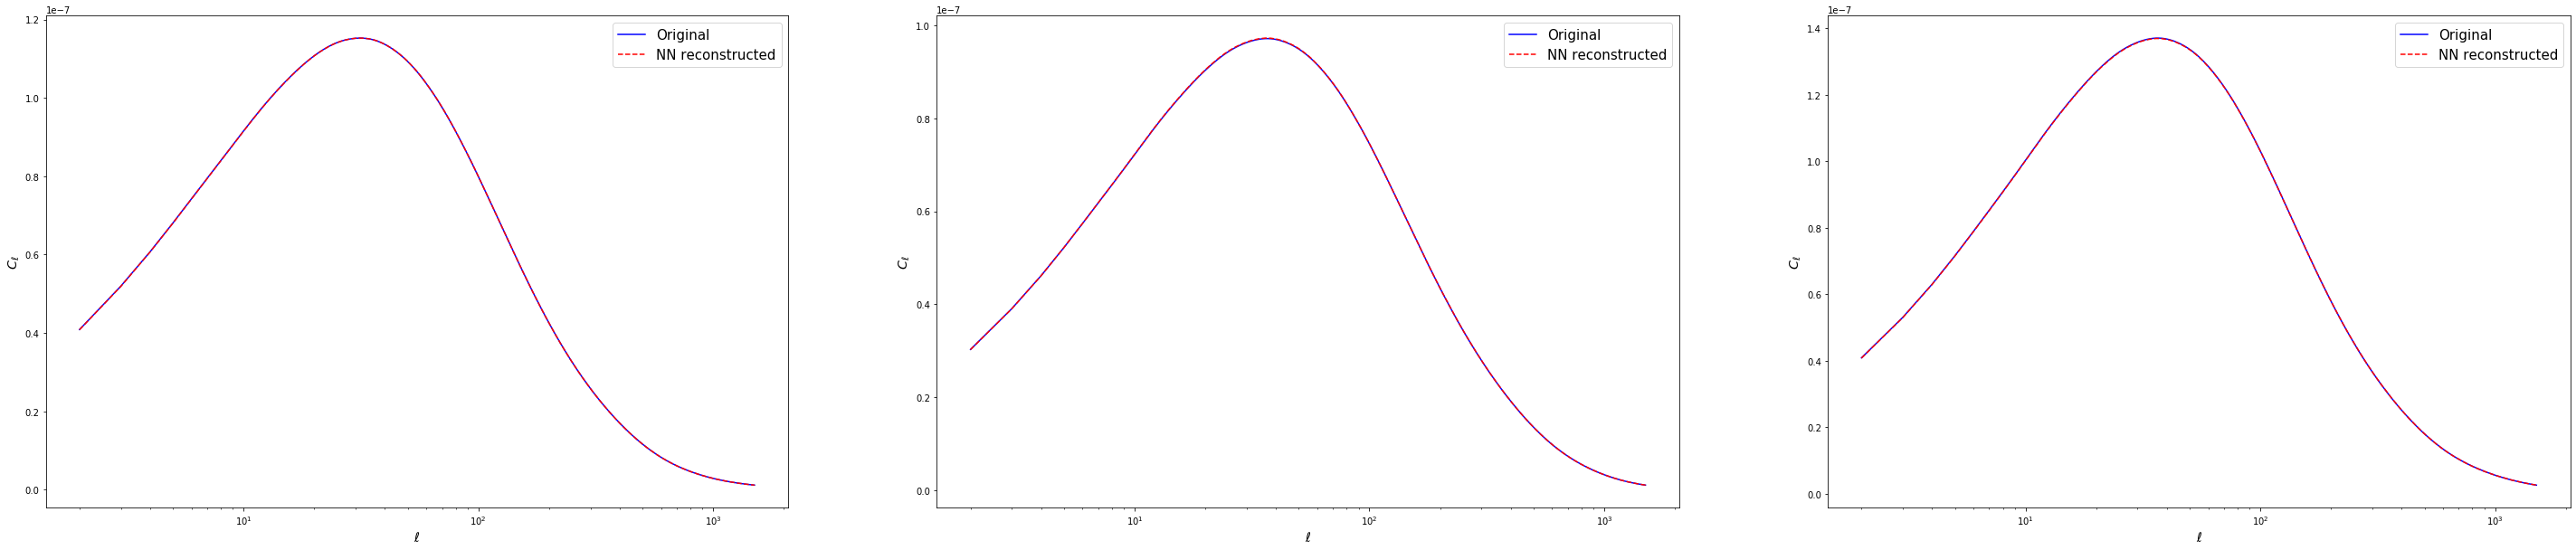

In [9]:
predicted_testing_spectra = cp_nn.ten_to_predictions_np(test_parameters)
import matplotlib.pyplot as plt
from matplotlib import gridspec
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(50,10))
for i in range(3):
    pred = predicted_testing_spectra[i] #*ell_range*(ell_range+1)/(2.*np.pi)
    true = testing_spectra[i] #*ell_range*(ell_range+1)/(2.*np.pi)
    ax[i].semilogx(ell_range, true, 'blue', label = 'Original')
    ax[i].semilogx(ell_range, pred, 'red', label = 'NN reconstructed', linestyle='--')
    ax[i].set_xlabel('$\ell$', fontsize='x-large')
    ax[i].set_ylabel('$C_\ell$', fontsize='x-large')
    ax[i].legend(fontsize=15)
plt.savefig('examples_reconstruction_phi_axion_no_nan.pdf')

In [ ]:
print(np.sum(np.isnan(spectra_)) / np.size(spectra_))
print(parameters_list.keys())
for i in range(10000): #spectra_.shape[0]):
    if np.sum(np.isnan(spectra_[i])):
        plt.scatter(np.log10(parameters_list['ma'][i]), parameters_list['omega_ax'][i])


0.0
dict_keys(['omega_b', 'omega_cdm', 'H_0', 'n_s', 'A_s', 'tau_reio', 'z', 'ma', 'omega_ax'])


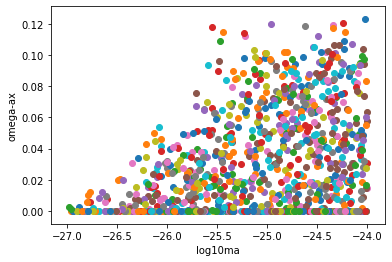

In [11]:
print(np.sum(np.isnan(spectra_)) / np.size(spectra_))
print(parameters_list.keys())
plt.xlabel('log10ma')
plt.ylabel('omega-ax')
for i in range(1000): #spectra_.shape[0]):
    if not np.sum(np.isnan(spectra_[i])):
        plt.scatter(np.log10(parameters_list['ma'][i]), parameters_list['omega_ax'][i])


In [ ]:
#Remove nan spectra
spectra_bool = np.array(np.sum(np.isnan(spectra_), axis=1), dtype=bool)
print(spectra_bool)
print(np.sum(spectra_bool) / spectra_bool.size)
print(spectra_[0])
print(spectra_[1])


In [ ]:
##Only for Google Colab
!git clone https://github.com/simonsobs/so_noise_models

diff_.shape is  (6490,)


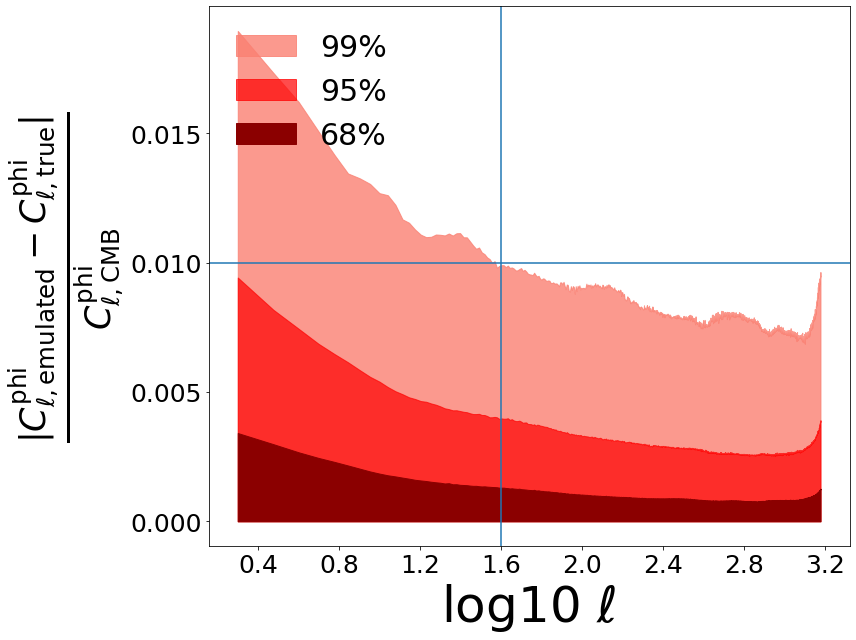

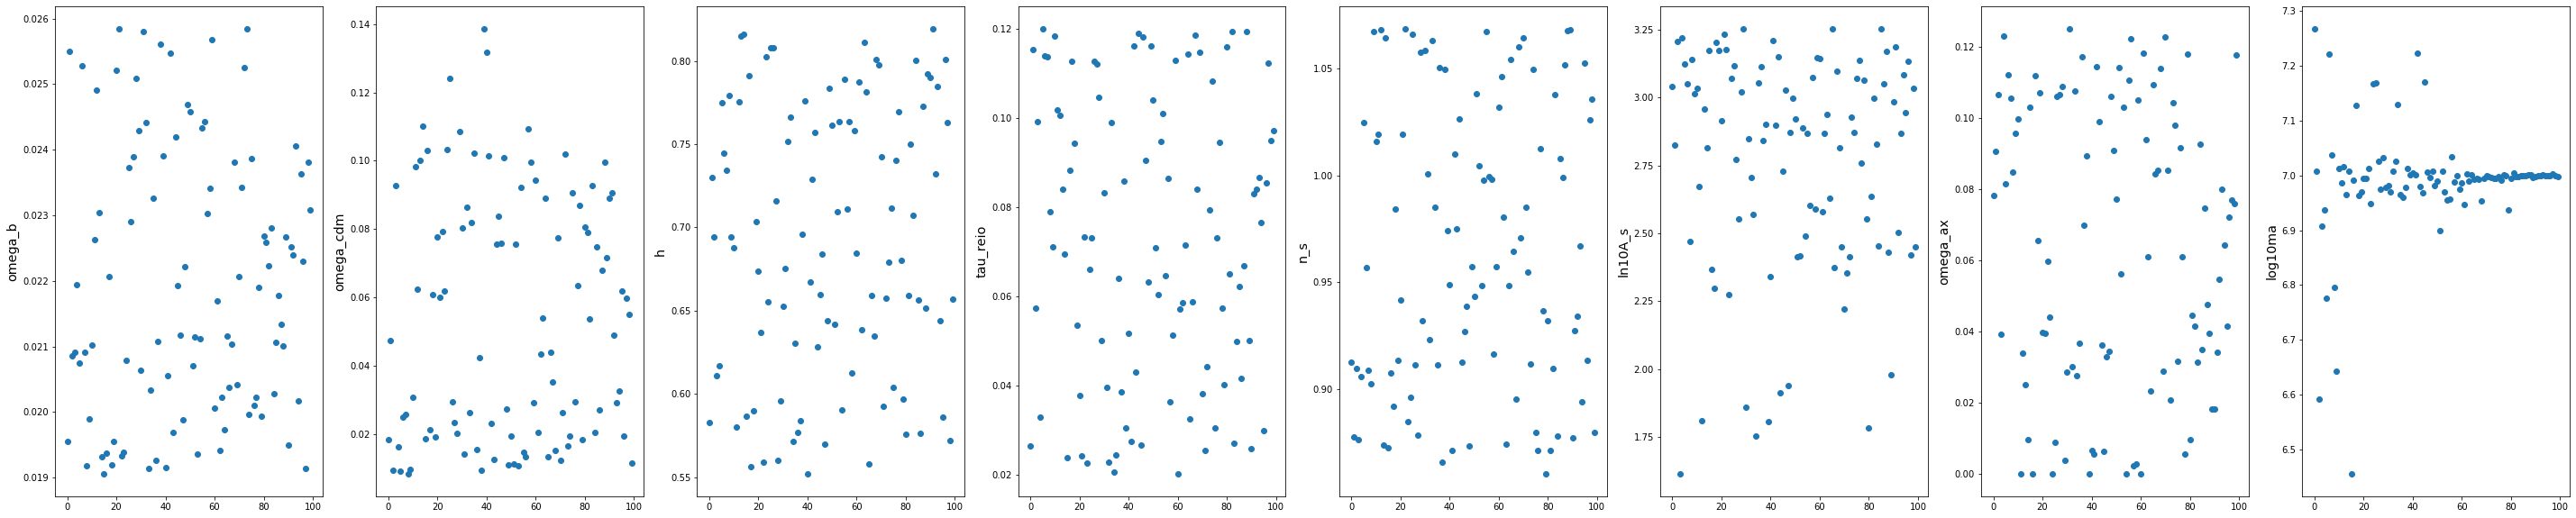

In [18]:
# load noise models from the SO noise repo
'''noise_levels_load = np.loadtxt('./so_noise_models/LAT_comp_sep_noise/v3.1.0/SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt')
conv_factor = (2.7255e6)**2

ells = noise_levels_load[:, 0]
SO_TT_noise = noise_levels_load[:, 1][:np.max(ell_range)+1-40] / conv_factor ##6001-40
new_ells = ells[:np.max(ell_range)+1-40] ##6001-40

f_sky = 0.4'''
prefac = 1. #np.sqrt(2/(f_sky*(2*new_ells+1)))

##Cut off some spectra
#print(new_ells)
#print(prefac.shape, testing_spectra.shape, SO_TT_noise.shape)
#testing_spectra = testing_spectra[:6001-40]

denominator = prefac*testing_spectra[:, :]  # use all of them #+SO_TT_noise #38:
diff = np.abs((predicted_testing_spectra[:, :] - testing_spectra[:, :])/(denominator))

# Compute percentiles
percentiles = np.zeros((4, diff.shape[1]))

percentiles[0] = np.percentile(diff, 68, axis = 0)
percentiles[1] = np.percentile(diff, 95, axis = 0)
percentiles[2] = np.percentile(diff, 99, axis = 0)
percentiles[3] = np.percentile(diff, 99.9, axis = 0)

plt.figure(figsize=(12, 9))
plt.fill_between(np.log10(ell_range), 0, percentiles[2,:], color = 'salmon', label = '99%', alpha=0.8)
plt.fill_between(np.log10(ell_range), 0, percentiles[1,:], color = 'red', label = '95%', alpha = 0.7)
plt.fill_between(np.log10(ell_range), 0, percentiles[0,:], color = 'darkred', label = '68%', alpha = 1)

# plt.ylim(0, 0.2)

plt.legend(frameon=False, fontsize=30, loc='upper left')
plt.ylabel(r'$\frac{| C_{\ell, \rm{emulated}}^{\rm{phi}} - C_{\ell, \rm{true}}^{\rm{phi}}|} {C_{\ell, \rm{CMB}}^{\rm{phi}}}$', fontsize=50)
plt.xlabel(r'log10 $\ell$',  fontsize=50)

plt.axhline(y=0.01)
plt.axvline(x=np.log10(40))
#plt.xscale('log')

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.setp(ax.get_xticklabels(), fontsize=25)
plt.setp(ax.get_yticklabels(), fontsize=25)
plt.tight_layout()
plt.savefig('./accuracy_emu_phi_axion.pdf')

diff_=np.sum(diff,axis = 1)
print('diff_.shape is ', diff_.shape)
sort_index = np.argsort(diff_)
bad_params = dict()
for key in test_parameters:
    bad_params[key] = []
for i in sort_index[len(sort_index)-100:]:
    for key in test_parameters:
        bad_params[key].append(test_parameters[key][i])
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(50,10))
for i in range(8):
    pa =list(test_parameters.keys())[i]
    h = bad_params[pa]
    ax[i].plot(h, 'o')
    ax[i].set_ylabel(pa, fontsize='x-large')
plt.savefig('bad_params_phi_axion.pdf')